In [343]:
# python version: python3
# I AM READING THE DATA PUTTING IT IN A PANDAS DATAFRAME FORMAT AND THEN DROPPING THE ROWS WHICH HAVE NAN VALUE AT PRICE COLUMN
import pandas as pd
df = pd.DataFrame(data = pd.read_csv("training.csv"))
df = df.dropna(subset=["price"])

## DATA PREPARATION

### part a

In [344]:
# TAKING ALL THE COLUMNS BUT PRICE COLUMN TO BUILD MY TRAININ_X_A AND TAKING PRICE COLUMN AS MY TARGET, TRAIN_Y
train_x_a = df.iloc[:,:-1] 
train_y = pd.DataFrame(df["price"],columns = ["price"])

In [345]:
train_x_a.head(2)

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,gas,std,four,sedan,rwd,front,104.3,188.8,67.2,56.2,...,four,141.0,mpfi,NaN,3.15,9.5,114.0,5400.0,24.0,28.0
1,gas,std,four,wagon,fwd,front,94.5,170.2,63.8,53.5,...,four,97.0,2bbl,3.15,3.29,9.4,69.0,5200.0,31.0,37.0


In [346]:
train_y.head(2)

,price
0,15985.0
1,7349.0


### part b

In [347]:
# FINDING THAT INCLUDES NAN VALUES AND PUTTING THEM IN A LIST FORMAT TO USE LATER
# THEN FILLING THE NAN VALUES WITH THE MEAN VALUE OF THE COLUMN
nan_columns = [train_x_a.columns[train_x_a.isna().any()].tolist()]
train_x_b = train_x_a.fillna(train_x_a.mean()) 

In [348]:
print(nan_columns)

[['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg']]


In [349]:
train_x_b.head(2)

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,gas,std,four,sedan,rwd,front,104.3,188.8,67.2,56.2,...,four,141.0,mpfi,3.310139,3.15,9.5,114.0,5400.0,24.0,28.0
1,gas,std,four,wagon,fwd,front,94.5,170.2,63.8,53.5,...,four,97.0,2bbl,3.150000,3.29,9.4,69.0,5200.0,31.0,37.0


### part c

In [350]:
# FINDING THE COLUMNS THAT HAVE "OBJECT" TYPES VALUES WHICH ARE ACTUALLY CATEGORICALL VALUES AND PUTTING THEM IN A LIST
categorical_columns = df.select_dtypes(["object"]).columns.tolist()

In [351]:
print(categorical_columns)

['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']


### part d

In [352]:
# IMPORTIN ONEHOTENCODER. DEFINING OUR ENCODER. THEN USING FIT_TRANSFORM FUNCTION OF ENCODER TO ENCODE CATEGORICAL VALUES
# CONVERTING OUR RESULT TO THE DATAFRAME FORMAT. THEN GETTIN OUR NUMERICAL COLUMNS AND PUTTING THEM IN DATAFRAME FORMAT
# MERGEING THESE TWO DATAFRAME

from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
encodedColumns = encoder.fit_transform(train_x_b[categorical_columns]).toarray()
encodedDataFrame = pd.DataFrame(encodedColumns,columns = encoder.get_feature_names())
numericalColumns = train_x_b.select_dtypes(["float64"]).columns.tolist()
numericalDataFrame = pd.DataFrame(train_x_b[numericalColumns],columns = numericalColumns)
train_x_d = encodedDataFrame.join(numericalDataFrame)

# NOTE: I DO NOT KNOW WHY BUT BEFORE MERGEING THEM I AM HAVING 155 ROWS FOR EACH DATA FRAME BUT AFTER MERGEING THEM
# SOME COLUMNS ARE HAVING SAME MISSING VALUES SO THAT IS WHY I AM FILLING THESE VALUES AGAIN WITH THE MEAN OF THE COLUMN
train_x_d = train_x_d.fillna(train_x_d.mean())

In [353]:
train_x_d.head(2)

,x0_diesel,x0_gas,x1_std,x1_turbo,x2_four,x2_two,x3_convertible,x3_hardtop,x3_hatchback,x3_sedan,...,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,56.2,2517.067114,141.0,3.310139,3.15,9.5,114.0,5400.0,24.0,28.0
1,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,53.5,2024.000000,97.0,3.150000,3.29,9.4,69.0,5200.0,31.0,37.0


### part e

In [354]:
# IMPORTING STANDARTSCALER AND DEFINING OUR SCALER AS STD_SCA. THEN USING FIT_TRANSFOR FUNCTION TO SCALE OUR VALUES AND AT
# LAST PUTTING THE RESULT INTO PANDAS DATAFRAME FORMAT 
from sklearn.preprocessing import StandardScaler
Std_Sca = StandardScaler()
train_x_e = Std_Sca.fit_transform(train_x_d)
train_x_e = pd.DataFrame(train_x_e,columns=train_x_d.columns)

In [355]:
train_x_e.head(2)

,x0_diesel,x0_gas,x1_std,x1_turbo,x2_four,x2_two,x3_convertible,x3_hardtop,x3_hatchback,x3_sedan,...,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,-0.315104,0.315104,0.530087,-0.530087,0.895726,-0.895726,-0.162758,-0.140488,-0.752101,1.006473,...,1.164116,0.027055,0.414161,0.012838,-0.293160,-0.116585,0.304007,0.610298,-0.212386,-0.437121
1,-0.315104,0.315104,0.530087,-0.530087,0.895726,-0.895726,-0.162758,-0.140488,-0.752101,-0.993569,...,-0.095474,-0.995073,-0.722702,-0.641444,0.166118,-0.145467,-0.947162,0.142416,0.909615,0.967850


## Data Exploration

### part f

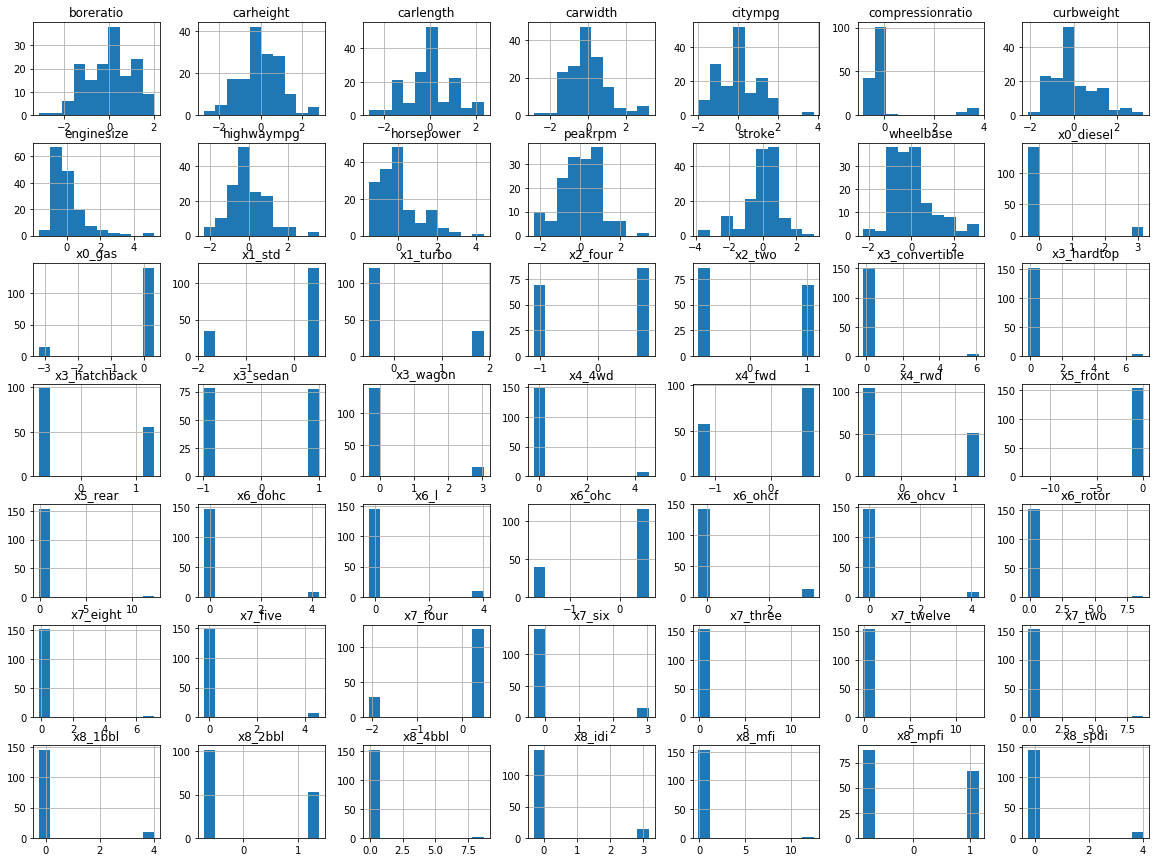

In [356]:
# IMPORTING MATPLOTLIB.PYPLOT. THEN PLOTING TRAINING VALUES.
%matplotlib inline
import matplotlib.pyplot as plt
train_x_e.hist(bins=10, figsize=(20,15))
plt.show()

# Are there any extreme points in these distributions?
    #- I DO NOT SEE ANY EXTREME POINTS IN HERE 

### part g

In [357]:
# TO SEE THE CORR WITH OUR TARGET, I AM JOINING OUR TARGET AND TRAIN DATAFRAMES AND GETTING THE CORRELATIONS
# THEN TAKING THE ABS OF THE VALUES AND  SORTING VALUES
# TAKING FROM SECOND TO SIXTH VALUES BECAUSE FIRST ONE IS PRICE ITSELF
# THEN PUTTING THESE INTO LIST 
allForCorr = train_x_e.join(train_y)
Corr_Matrix = allForCorr.corr()
top_5_corr = abs(Corr_Matrix["price"]).sort_values(ascending=False)[1:6].keys().tolist()

In [358]:
print(top_5_corr)

['enginesize', 'curbweight', 'horsepower', 'carwidth', 'highwaympg']


### part h

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000205950B84C8>,
      dtype=object)

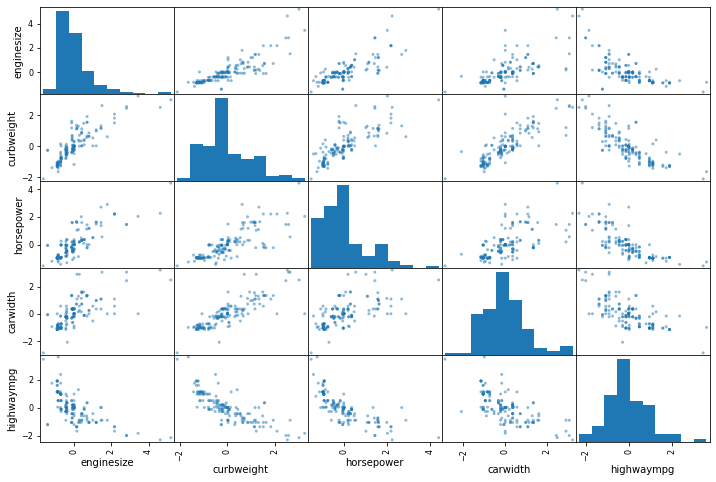

In [359]:
# IMPORTING SCATTER MATRIX AND USING IT WITH OUR TOP 5 FEATURES
from pandas.plotting import scatter_matrix
scatter_matrix(train_x_e[top_5_corr], figsize=(12, 8))

## LINEAR REGRESSION TO PREDICT CAR PRICES

### part i

In [382]:
# IMPORTING OUR LINEAR REGRESSION AND CREATING OUR MODEL WITH THE TRAIN_X_E AND TRAIN_Y
# IMPORTING MEAN_SQUARED_ERROR AND CHECKING THE MSE TO PRINT
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression().fit(train_x_e,train_y)
from sklearn.metrics import mean_squared_error
lr_prediction_traininset = lr_model.predict(train_x_e)
train_mse_score = mean_squared_error(train_y,lr_prediction_traininset)
print(train_mse_score)

8982050.212925982


### part j

In [361]:
# IMPORTING CROSS_VAL_SCORE FUNCTION
# GETTING OUR CV SCORES AND TAKING THEIR SQUARES
import numpy as np
from sklearn.model_selection import cross_val_score
results = cross_val_score(lr_model,train_x_e,train_y,scoring = "neg_mean_squared_error",cv=5)
train_mse_score = np.sqrt(-results)
print(train_mse_score)

[3.35936526e+15 5.88206119e+15 3.77926091e+03 3.82146855e+17
 6.97558012e+15]


In [362]:
average_mse = np.mean(train_mse_score)
print(average_mse)

7.967277238367218e+16


### part k

In [363]:
# READING THE TEST DATA AND DIRECTLY DROPING THE PRICE NAN ROWS AND TAKING THE ALL COLUMNS FOR TEST SET BUT PRICE
# THEN PUTTING THEM IN DATAFRAME FORMAT
testDf = pd.DataFrame(data = pd.read_csv("test.csv")).dropna(subset=["price"])
test_x = testDf.drop(["price"],axis=1)
test_y = pd.DataFrame(data = testDf["price"])

In [364]:
test_x.head(2)

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,...,five,136.0,mpfi,3.19,3.40,8.5,110.0,5500.0,19.0,25.0
1,gas,std,four,sedan,fwd,front,96.5,175.4,62.5,54.1,...,four,110.0,1bbl,3.15,3.58,9.0,86.0,NaN,27.0,33.0


In [365]:
test_y.head(2)

,price
0,18920.0
1,10295.0


In [366]:
# DOING ALL WE DID IN PREVIOUS PARTS AGAIN
test_x = test_x.fillna(train_x_a.mean())
encoder = OneHotEncoder()
encodedColumns = encoder.fit_transform(test_x[categorical_columns]).toarray()
encodedDataFrame = pd.DataFrame(encodedColumns,columns = encoder.get_feature_names())
numericalColumns = test_x.select_dtypes(["float64"]).columns.tolist()
numericalDataFrame = pd.DataFrame(test_x[numericalColumns],columns = numericalColumns)
test_x = encodedDataFrame.join(numericalDataFrame)
test_x

,x0_diesel,x0_gas,x1_std,x1_turbo,x2_four,x2_two,x3_convertible,x3_hardtop,x3_hatchback,x3_sedan,...,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,55.700000,2954.000000,136.000000,3.19,3.400000,8.500000,110.000000,5500.000000,19.000000,25.000000
1,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,54.100000,2372.000000,110.000000,3.15,3.580000,9.000000,86.000000,5129.109589,27.000000,33.000000
2,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,54.900000,3495.000000,183.000000,3.58,3.640000,21.500000,123.000000,4350.000000,22.000000,25.000000
3,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,52.800000,4066.000000,258.000000,3.63,4.170000,8.100000,176.000000,4750.000000,15.000000,19.000000
4,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,51.600000,2756.000000,194.000000,3.74,2.900000,9.500000,207.000000,5900.000000,17.000000,30.831081
5,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,53.000000,2975.000000,146.000000,3.62,3.500000,9.300000,116.000000,4800.000000,25.364238,30.000000
6,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,56.700000,3900.000000,308.000000,3.80,3.350000,8.000000,184.000000,4500.000000,14.000000,16.000000
7,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,54.300000,2824.000000,136.000000,3.19,3.400000,8.000000,115.000000,5500.000000,18.000000,22.000000
8,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,56.500000,3515.000000,183.000000,3.58,3.640000,21.500000,123.000000,4350.000000,25.364238,25.000000
9,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,53.684932,3075.000000,120.000000,3.46,3.190000,8.400000,97.000000,5000.000000,19.000000,24.000000


In [367]:
Std_Sca = StandardScaler()
c = test_x.columns
test_x = Std_Sca.fit_transform(test_x)
test_x = pd.DataFrame(test_x,columns=c).fillna(train_x_e.mean())

### part l

In [368]:
# PREDICTING TEST_X AND PRINTING COEF_
predicted_values = lr_model.predict(test_x)
lr_model.coef_

array([[ 2.65666577e+13,  9.86508658e+11,  1.09659406e+16,
         1.09659406e+16, -2.51497480e+16, -2.51497480e+16,
         7.16547676e+15,  6.22599896e+15,  2.17089208e+16,
         2.25953611e+16,  1.33609171e+16, -2.60697409e+16,
        -6.07514574e+16, -5.89873104e+16, -1.67623388e+16,
        -1.67623388e+16, -4.28290750e+15, -4.52723165e+15,
        -8.40032971e+15, -5.17360987e+15, -4.28290750e+15,
         5.19156392e+16,  1.11917660e+16,  1.68692617e+16,
         3.16811159e+16,  2.40173920e+16,  6.50394049e+15,
         6.50394049e+15, -8.09564795e+16,  2.17807012e+16,
         4.41786250e+16,  4.65349478e+16,  2.66705154e+16,
         7.45649163e+15,  4.61373782e+16,  2.17807012e+16,
         1.12600000e+03, -1.18700000e+03, -2.01000000e+02,
        -4.00000000e+02,  6.83000000e+02, -5.18000000e+02,
        -1.80000000e+01,  1.28000000e+02, -1.78000000e+02,
         5.80000000e+02,  2.83500000e+02,  8.30000000e+02,
        -6.38500000e+02]])

In [369]:
print(predicted_values[10:13])

[[-3.24425392e+16]
 [-2.96671089e+16]
 [ 2.35423983e+16]]


In [370]:
test_mse_score = mean_squared_error(predicted_values,test_y)
print(test_mse_score)

1.1917174925074757e+33


### part m

In [371]:
# IMPORTING POLYNOMIALFEATURES FUNCTION AND DEFININ OUR TRANSFORMER THEN USING FIT_TRANSFOR FUNC TO CONVERT OUR DATA 
from sklearn.preprocessing import PolynomialFeatures
Pol_Trans = PolynomialFeatures(2)
train_x_m = Pol_Trans.fit_transform(train_x_e)
train_x_m = pd.DataFrame(train_x_m)



In [372]:
train_x_m.head(2)

,0,1,2,3,4,5,6,7,8,9,...,1265,1266,1267,1268,1269,1270,1271,1272,1273,1274
0,1.0,-0.315104,0.315104,0.530087,-0.530087,0.895726,-0.895726,-0.162758,-0.140488,-0.752101,...,0.092420,0.185535,-0.064567,-0.132888,0.372464,-0.129619,-0.266774,0.045108,0.092839,0.191075
1,1.0,-0.315104,0.315104,0.530087,-0.530087,0.895726,-0.895726,-0.162758,-0.140488,-0.752101,...,0.897117,-0.134891,-0.861553,-0.916711,0.020282,0.129544,0.137837,0.827400,0.880371,0.936734


In [373]:
lr_model_p = LinearRegression()
lr_model_poly = lr_model_p.fit(train_x_m,train_y)

In [379]:
average_mse = np.mean(np.sqrt(-(cross_val_score(lr_model_poly,train_x_m,train_y,scoring = "neg_mean_squared_error",cv=5))))
print(average_mse)

8523.104737731828


### part n

In [380]:
# IMPORTING LASSO AND FITING THE TRAINING SET ON THE MODEL
from sklearn.linear_model import Lasso
lasso = Lasso().fit(train_x_m,train_y)


C:\Users\fatihbeyhan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13708190.860732533, tolerance: 920722.9017414534
  positive)


In [381]:
average_mse =np.mean(np.sqrt(-(cross_val_score(lasso,train_x_m,train_y,scoring = "neg_mean_squared_error",cv=5))))
print(average_mse)

C:\Users\fatihbeyhan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8979419.595313357, tolerance: 682422.0779853245
  positive)
C:\Users\fatihbeyhan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9018360.200522684, tolerance: 754070.2752435484
  positive)
C:\Users\fatihbeyhan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8741133.722091358, tolerance: 814699.377570502
  positive)
C:\Users\fatihbeyhan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:

7768.288064760937


C:\Users\fatihbeyhan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6985495.212716528, tolerance: 757265.7578705018
  positive)


### part o

In [377]:
# I HAVE NO IDEA ABOUT HOW TO DO THIS. SORRY
all_scores = []
min_error = 0
min_alpha = 0
    

In [ ]:
print(f"Minimum error was {round(min_error, 2)} at alpha {min_aplha}")

### part p

In [ ]:
# I HAVE NO IDEA ABOUT HOW TO DO THIS. SORRY
best_mse = 
best_parameters = 